# Assignment 1
Jaime Guzman Parada
S222025

# Part 1: Binning degree distributions


A. Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = np.random.normal(loc=2, scale=0.125, size=5000)
hist,bins = np.histogram(data, bins=10)


In [55]:
len(bins)

11

<BarContainer object of 10 artists>

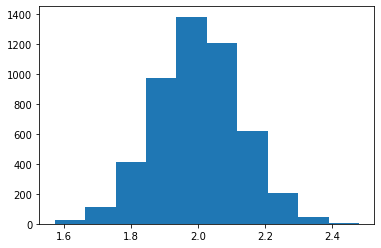

In [45]:
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')

In [ ]:
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((np.random.normal(size=5000),
                np.random.normal(loc=2,scale=0.125, size=5000)))
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

The problem with plotting can be solve in two different ways. The first one is selecting the first array that is returned from np.hist, which contains the values of the histogram according to numpy documentation. The other approach is to do something similar to the example shown in the documentation, where you create a tuple with two random gaussians, where only one has our conditions, while the other one is only the same size. After that is done you use the np.hstack function to merge both arrays. This does yield a plot that could be consider correct, but is much harder to read. 

It is therefore concluded that utilizing the matplotlib bar funciton and using the bins data alongside de histogram values can help us plot a more readable histogram. The align set to the edge is not necesarry, but is recommended.

B. Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
  

In [22]:
pois = np.random.poisson(lam=10, size=5000)
print('Maximum of our poisson function: ', pois.max())
print('Minimum of our poisson function ', pois.min())

Maximum of our poisson function:  23
Minimum of our poisson function  1


In [57]:
l_bin = 10
bins = np.linspace(pois.min(), pois.max(), l_bin)
bins

array([ 1.        ,  3.44444444,  5.88888889,  8.33333333, 10.77777778,
       13.22222222, 15.66666667, 18.11111111, 20.55555556, 23.        ])

In [58]:
np.histogram(pois, bins=bins)

(array([  43,  300, 1334, 1208, 1404,  470,  203,   33,    5], dtype=int64),
 array([ 1.        ,  3.44444444,  5.88888889,  8.33333333, 10.77777778,
        13.22222222, 15.66666667, 18.11111111, 20.55555556, 23.        ]))

In [60]:
np.sum(bins)

120.00000000000001

The first and last element of our *bins* array are the values that are the minimum and maximum of our poisson distribution. This is because this are the threshhold values that limit the values that can be contained in the bin. Therefore it is required that this are the minimum, as there shouldn't be another value that is smaller than it, and the maximum as there shouldn't be a value that is above it. If these two are not the minimum and maximum, some values that are either smaller or larger will not be included in any bin.

C. Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [6]:
k = 10
N = 5000
p = k/(N-1)
seed = 49
erdo_poiss = np.random.poisson(lam=10 ,size=N)

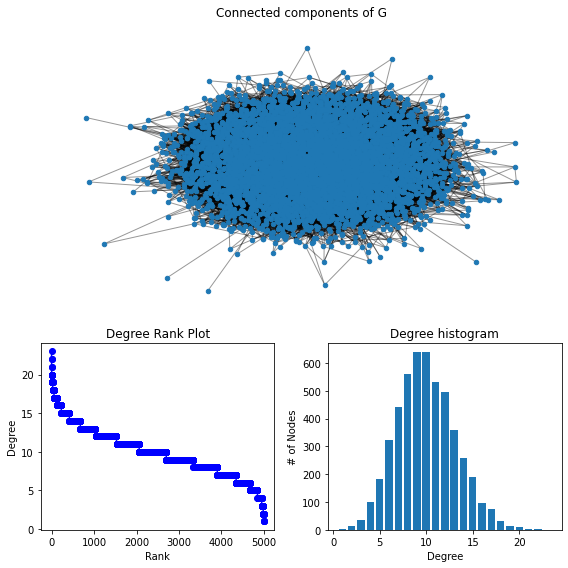

In [9]:
G = nx.binomial_graph(N, p, seed=seed)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=seed)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

B. Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

3.1
Consider an Erdos-Renyi network with $N=3000$ nodes, connected to each other with probability $p=10^{-3}$

(a) What is the expected number of links, $\langle L \rangle $?

To calculate the expectd number of links we utilize the following formula:
$$
\begin{align*}
    \langle L \rangle = p\frac{k(k-1)}{2}
\end{align*}
$$

We calculate $k$ utilizing our know formula to get $k=2.999$ which we can just round to $k=3$. Therefore utilizing our formula above we get the following:
$$
\begin{align*}
    \langle L \rangle = 10^{-3}\frac{3(3-1)}{2} = \frac{3}{1000} = 0.003
\end{align*}
$$

(b) In which regime is the network?

We know that since our network has a value of $\langle k \rangle > 1$ it is not in the subcritical regime. When we calculate $\ln N$ we see that we get $\ln 3000 \approx 8.0064$ which is greater than our $k$. Therefore we are not in the fully connected regime, which leaves us in the **supercritical regime**.

(c) Calculate the probability $p_c$ so that the network is at the critical point.

Utilizing what we did on the last exercise we know that our $k$ should at least be greater than $8.0065$, therefore we are going to utilized the following formula
$$
\begin{align*}
    p_c = \frac{\langle k \rangle}{N-1}     & \text{given that } \space  k = 1 \\
    p_c = \frac{1}{3000-1} = 0.0003334445
\end{align*}
$$

Therefore we can say that we need $p=0.0003334445$ which we can round to $p=0.00033$.

(d) Given the linking probability $p=10^{-3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

To calculate this we have to be in the fully connected regime, which requires us to have a $\langle k \rangle \geq \ln 3000$ which we already calculated to be around $8.0064$. Therefore given the know probability, we need to do the following:
$$
\begin{align*}
    \langle k \rangle = p(N-1) \\
    8.0064 = p(N-1) \\
    8.0064 = 10^{-3}(N-1) \to \frac{8.0064}{10^{-3}} = N-1 \\
    N = \frac{8.0064}{10^{-3}}+1
\end{align*}
$$
Which yields us $N=8007.4000$ whcih can be rounded to $N=8008$.

(e) For the network in (d), calculate the average degree $\langle k^{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$.

$\langle k^{cr} \rangle = 10^{-3}(8008-1) = 8.0070 \\$
$\langle d \rangle = \frac{\ln N}{\ln \langle k \rangle} = \frac{\ln 8008}{\ln 8.007} = 4.3206$

(f) Calculate the degree disribution $p_k$ of this network (approximate with a Poisson degree distribution).

The poisson form to calculate $p_k$ is
$$
\begin{align*}
    p_k = e^{-\langle k \rangle}\frac{\langle k \rangle^k}{k!} \\
    p_k = e^{-8.007}\frac{8.007^{8.007}}{8!} = 0.14163
\end{align*}
$$
where we use the average degree as our $k$, but this can change depending on the degrees that we want to calculate.

# Part 3: Watts-Strogatz Networks

A. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


In [33]:
Gl = nx.connected_watts_strogatz_graph(500, 4, 0, seed=seed)
pathl = nx.shortest_path_length(Gl)
pathl

<generator object all_pairs_shortest_path_length at 0x00000178BBAE9070>

In [75]:
import random
def test_omega():
    Gl = nx.connected_watts_strogatz_graph(500, 4, 0, seed=seed)
    Gr = nx.connected_watts_strogatz_graph(500, 4, 1, seed=seed)
    Gs = nx.connected_watts_strogatz_graph(500, 4, 0.1, seed=seed)
    # omegal = nx.omega(Gl, niter=1, nrand=1, seed=seed)
    # omegar = nx.omega(Gr, niter=1, nrand=1, seed=seed)
    # omegas = nx.omega(Gs, niter=1, nrand=1, seed=seed)
    pathl = dict(nx.shortest_path_length(Gl))
    pathr = dict(nx.shortest_path_length(Gr))
    paths = dict(nx.shortest_path_length(Gs))

    fig, ax = plt.subplots(3, figsize=(12,8))

    ax[0].bar(pathl[1].keys(),pathl[1].values())
    ax[0].set_title('Probability = 0')
    ax[1].bar(pathr[1].keys(),pathr[1].values())
    ax[1].set_title('Probability = 1')
    ax[2].bar(paths[1].keys(),paths[1].values())
    ax[2].set_title('Probabilty = 0.1')

    print('Average shortest distance for p = 0: ',sum(pathl[1].values())/len(pathl[1]))
    print('Average shortest distance for p = 1: ',sum(pathr[1].values())/len(pathr[1]))
    print('Average shortest distance for p = 0.1: ',sum(paths[1].values())/len(paths[1]))
    """
    # draw graph
    pos = nx.shell_layout(G)
    print G.number_of_nodes()
    print G.number_of_edges()
    print G.edges()
    nx.draw(G, pos)
    # show graph
    plt.show()
    """
    plt.show()
    # return pathl
    # print(f'omegas: {omegas}\n omegal: {omegal}\n omegar: {omegar}'.format(omegas,omegal,omegar))
    # print(f'Paths: {paths}\n Pathl: {pathl}\n Pathr: {pathr}'.format(paths, pathl, pathr))
    # assert(omegal < omegas and omegas < omegar)
    # return pathl, pathr, paths

AttributeError: 'bool' object has no attribute 'all'

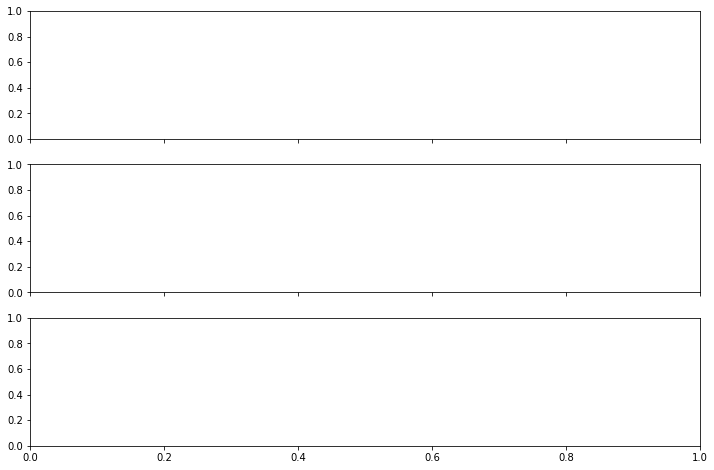

In [217]:
import seaborn as sns
def test_omega():
    Gl = nx.connected_watts_strogatz_graph(500, 4, 0, seed=seed)
    Gr = nx.connected_watts_strogatz_graph(500, 4, 1, seed=seed)
    Gs = nx.connected_watts_strogatz_graph(500, 4, 0.1, seed=seed)
    # omegal = nx.omega(Gl, niter=1, nrand=1, seed=seed)
    # omegar = nx.omega(Gr, niter=1, nrand=1, seed=seed)
    # omegas = nx.omega(Gs, niter=1, nrand=1, seed=seed)
    pathl = dict(nx.shortest_path_length(Gl))
    pathr = dict(nx.shortest_path_length(Gr))
    paths = dict(nx.shortest_path_length(Gs))

    fig, ax = plt.subplots(3, figsize=(12,8), sharex=True)

    # ax[0].plot(pathl[1].values())
    # ax[0].bar(pathl[1].keys(), pathl[1].values(), ls='step')
    sns.barplot(pathl[1].keys(), pathl[1].values(), ax=0)
    ax[0].set_title('Probability = 0')
    # ax[1].plot(pathr[1].values())
    ax[1].bar(pathr[1].keys(), pathr[1].values(), fill=False)
    ax[1].set_title('Probability = 1')
    # ax[2].plot(paths[1].values())
    ax[2].bar(paths[1].keys(), paths[1].values(), fill=False)
    ax[2].set_title('Probabilty = 0.1')
    ax[2].set_xlabel('Node')
    ax[0].set_ylabel('Distance')
    ax[1].set_ylabel('Distance')
    ax[2].set_ylabel('Distance')

    print('Average shortest distance for p = 0: ',sum(pathl[1].values())/len(pathl[1]))
    print('Average shortest distance for p = 1: ',sum(pathr[1].values())/len(pathr[1]))
    print('Average shortest distance for p = 0.1: ',sum(paths[1].values())/len(paths[1]))

    plt.show()

test_omega()

Average shortest distance for p = 0:  62.75
Average shortest distance for p = 1:  4.812
Average shortest distance for p = 0.1:  7.16


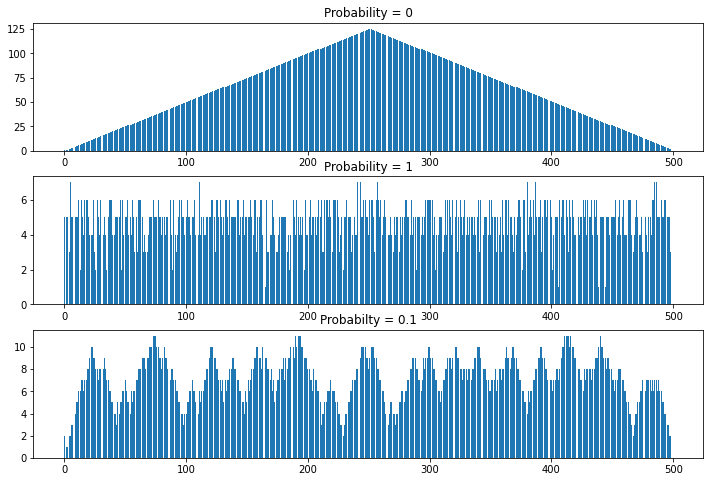

{0: {0: 0,
  498: 1,
  1: 1,
  2: 1,
  499: 1,
  3: 2,
  4: 2,
  496: 2,
  497: 2,
  5: 3,
  6: 3,
  494: 3,
  495: 3,
  7: 4,
  8: 4,
  492: 4,
  493: 4,
  9: 5,
  10: 5,
  491: 5,
  490: 5,
  11: 6,
  12: 6,
  489: 6,
  488: 6,
  486: 7,
  487: 7,
  13: 7,
  14: 7,
  484: 8,
  485: 8,
  15: 8,
  16: 8,
  482: 9,
  483: 9,
  17: 9,
  18: 9,
  480: 10,
  481: 10,
  19: 10,
  20: 10,
  21: 11,
  22: 11,
  478: 11,
  479: 11,
  23: 12,
  24: 12,
  476: 12,
  477: 12,
  474: 13,
  25: 13,
  26: 13,
  475: 13,
  27: 14,
  28: 14,
  472: 14,
  473: 14,
  470: 15,
  471: 15,
  29: 15,
  30: 15,
  32: 16,
  468: 16,
  469: 16,
  31: 16,
  33: 17,
  34: 17,
  466: 17,
  467: 17,
  35: 18,
  36: 18,
  464: 18,
  465: 18,
  37: 19,
  38: 19,
  462: 19,
  463: 19,
  39: 20,
  40: 20,
  460: 20,
  461: 20,
  41: 21,
  42: 21,
  459: 21,
  458: 21,
  43: 22,
  44: 22,
  457: 22,
  456: 22,
  454: 23,
  455: 23,
  45: 23,
  46: 23,
  452: 24,
  453: 24,
  47: 24,
  48: 24,
  450: 25,
  451: 25,
  49

In [76]:
# pathl, pathr, paths = test_omega()
test_omega()

When $p=1$ we find that we have a more paths with similar shortest distance compared to probability 0, which is more concentrated on the mid value, or compared to 0.1, which is more cyclical.

B. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [ ]:
a = {}
for i in range(5):
    if 'a' in a.keys():
        a['a'] = [i]
    else:
        a['a'].append(i)
print(a)

{'a': [0, 1, 2, 3, 4]}


In [203]:
import random
import numpy as np
def node_gen(size: int, N: int, k: int, p: list):

    distances = []
    std = []
    # for j in range(size):
    for i in p:
        G = nx.connected_watts_strogatz_graph(N, k, i)
        paths = dict(nx.shortest_path_length(G))
        shortes_path_avg = sum(paths[1].values())/len(paths[1])
        std.append(np.std(list(paths[1].values())))
        # if i not in distances:
        distances.append(shortes_path_avg)
            # else:
            #     distances[i].append(shortes_path_avg)
            #     std[i].append(std_path)
    # print(distances.keys())
    # plt.plot(distances.keys(), distances.values(), '*-')
    plt.errorbar(p, distances, yerr=std, ecolor='r')
    plt.xlabel('Probability')
    plt.ylabel('Average distance')
    # for key in distances.keys():
    #     plt.plot(range(len(distances[key])), distances[key], label=key)
    #     plt.plot(range(len(std[key])), std[key], 'r--')
    # plt.legend()
    plt.show()

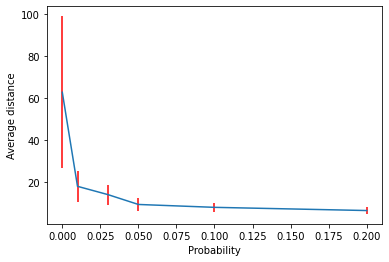

In [204]:
node_gen(50, 500, 4, [0,0.01,0.03,0.05,0.1,0.2])

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

B. Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

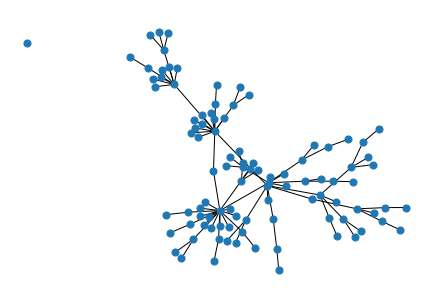

In [131]:
import networkx as nx
from numpy.random import choice
b = {}
nodes = [*range(1,101)]
G = nx.Graph()
for i in nodes:
    # connections = rand.randint(0,len(b))
    G.add_node(i)
    if len(b) > 2:
        connection = choice(list(b.keys()),p=[x/sum(b.values()) for x in b.values()])
        G.add_edge(i,connection)
    b = dict(G.degree)
    if len(b.keys()) == 2:
        G.add_edge(i-1,i)
nx.draw(G, node_size=50)

The minimum degree is: 0
 The maximum degree is: 144


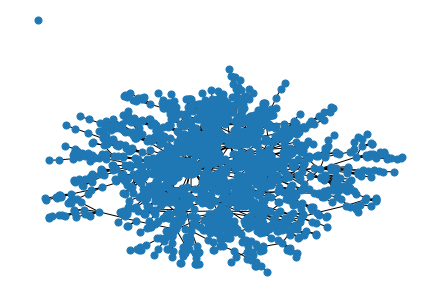

In [137]:
b = {}
nodes = [*range(1,2001)]
G = nx.Graph()
for i in nodes:
    # connections = rand.randint(0,len(b))
    G.add_node(i)
    if len(b) > 2:
        connection = choice(list(b.keys()),p=[x/sum(b.values()) for x in b.values()])
        G.add_edge(i,connection)
    b = dict(G.degree)
    if len(b.keys()) == 2:
        G.add_edge(i-1,i)
nx.draw(G, node_size=50)
degree = dict(G.degree())
degmin = min(degree.values())
degmax = max(degree.values())
print(f'The minimum degree is: {degmin}\n The maximum degree is: {degmax}')

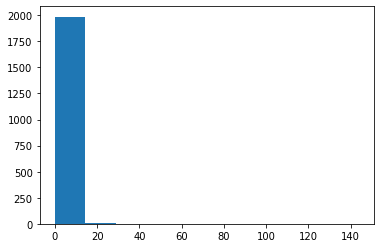

In [161]:
import matplotlib.pyplot as plt
values, bins =np.histogram(list(degree.values()))
_ = plt.hist(list(degree.values()))  # arguments are passed to np.histogram
plt.title("Histogram with linear distribution")
plt.show()

C:\Users\guzma\AppData\Local\Temp\ipykernel_19804\2760015043.py:2: RuntimeWarning: divide by zero encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


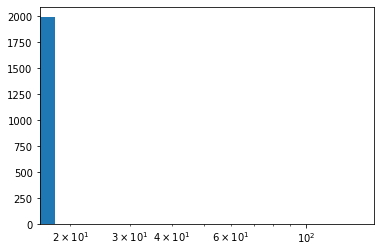

In [167]:
hist, bins, _ = plt.hist(degree.values(), bins=8)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(degree.keys(), bins=logbins)
plt.xscale('log')
plt.show()

# Part 5. Power-laws and the friendship paradox


Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

A. The friendship paradox in BA networks
* Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
* Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

B. The friendship paradox more generally
* What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower? 
 - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
 - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?
- Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in 5.A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
   - What fraction of the time is the friendship paradox is true for the **F-CM** network?
   - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
      * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
      * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

# Part 6. Growth without Preferential Attachment

Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follwo the steps below for success

* Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, *but have the incoming nodes connect to the existing nodes with* **equal probability**. Let's call this the Sune-network.
* Generate an ER network of same size and same $p$ as the Sune-network. 
* What are the differences between the ER network and the Sune-network? Explain in your own words. 
  * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.